### ### this project aims to find whether a person will have heart disease in the next ten years or not.

In [1]:
# let's import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Uploadin data 

In [2]:
raw_data = pd.read_csv('framingham.csv')
data = raw_data.copy()
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### let's deal with the missing data

In [4]:
data.isnull().sum()
# As there are a lot of missing data in the glucose data column, we need to remove this column.

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
data.drop('glucose',axis=1, inplace=True)

In [6]:
data_no_mv = data.dropna(axis=0)
#removing missing data

In [8]:
data_no_mv.isnull().sum()
# good, we do not have any missing values.

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [10]:
data_no_mv.describe()
# by removing missing values, I drop the number of data points by around 5%.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433158,49.478806,1.981941,0.491096,9.020316,0.029345,0.005518,0.309506,0.025332,236.620517,132.222724,82.861174,25.774650,75.873840,0.149235
std,0.495574,8.531588,1.020696,0.499983,11.914558,0.168794,0.074087,0.462348,0.157152,44.019766,21.949243,11.882166,4.079846,12.087463,0.356365
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,27.990000,83.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,1.000000


#### let's deal with the outliers

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

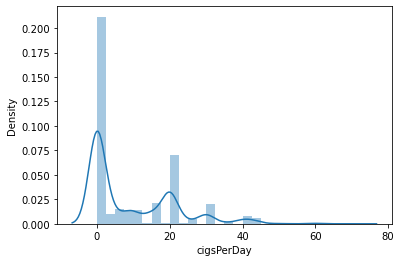

In [11]:
sns.distplot(data_no_mv['cigsPerDay'])
# the outliers for the cigar distribution per day is on the right side of the distribution.


In [14]:
q_cig = data_no_mv['cigsPerDay'].quantile(0.99)
q_cig
# 99 percent of the persons smoke less than 43 cigar per day. let's remove the 1 percent with more than 43 ciars.

43.0

In [15]:
data_cig = data_no_mv[data_no_mv['cigsPerDay']<q_cig]

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

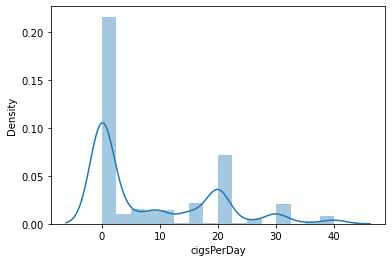

In [16]:
sns.distplot(data_cig['cigsPerDay'])


In [18]:
data_cig.describe()
# we droped data sets from 3987 to 3913 data points

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
count,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000,3913.000000
mean,0.424994,49.513672,1.983389,0.481472,8.316892,0.029389,0.005622,0.307692,0.025811,236.500128,132.192819,82.814465,25.754827,75.795809,0.148224
std,0.494405,8.547167,1.020235,0.499720,10.825005,0.168916,0.074780,0.461597,0.158593,44.070409,21.974099,11.897766,4.074112,12.071340,0.355367
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.050000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.360000,75.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,27.980000,83.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,1.000000


In [20]:
# let's explore the relationship for total cholesterol.
#by searching on the net, we can find that the maximum values for total cholesterol are around 400. 
#let's remove values greater than 400.
data_chol = data_cig[data_cig['totChol']<400]


In [21]:
data_chol.describe()
# we removed 9 data points.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,0.424949,49.515369,1.984119,0.481301,8.313525,0.029201,0.005635,0.306865,0.025615,236.014857,132.167649,82.805584,25.755407,75.771004,0.147285
std,0.494399,8.551828,1.020795,0.499714,10.828813,0.168391,0.074866,0.461252,0.158003,42.855677,21.967032,11.895371,4.077079,12.064003,0.354435
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,74.500000,23.050000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.360000,75.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.125000,89.500000,27.980000,82.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,398.000000,295.000000,142.500000,56.800000,143.000000,1.000000


In [22]:
# for sysBP, the maximum could be 220 based on reasearch on the net.
data_sysBP = data_chol[data_chol['sysBP']<220]


In [23]:
data_sysBP.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
count,3896.000000,3896.00000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000
mean,0.425565,49.49538,1.985113,0.481776,8.321612,0.028491,0.005647,0.305441,0.025667,235.988706,131.943147,82.721124,25.746040,75.742556,0.146817
std,0.494492,8.54570,1.021356,0.499732,10.832865,0.166392,0.074942,0.460653,0.158161,42.857676,21.398533,11.742337,4.058919,12.050501,0.353969
min,0.000000,32.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.875000,74.500000,23.050000,68.000000,0.000000
50%,0.000000,49.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.360000,75.000000,0.000000
75%,1.000000,56.00000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.000000,89.000000,27.970000,82.000000,0.000000
max,1.000000,70.00000,4.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,398.000000,217.000000,140.000000,56.800000,143.000000,1.000000


#let's remove the outlires for the DiaBP, Heart rate, and BMI, according to the data on the internet and distribution function


In [24]:
# diaBP outliers:
data_clean_1 = data_sysBP[data_sysBP['diaBP']<125]

In [25]:
# BMI
data_clean_2 = data_clean_1[data_clean_1['BMI']<40]

In [26]:
#HeartRate
data_clean_3 = data_clean_2[data_clean_2['heartRate']<130]

In [27]:
data_clean_3.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
count,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000
mean,0.427424,49.449456,1.989632,0.483411,8.348626,0.027994,0.005443,0.300156,0.024624,235.969933,131.523717,82.462157,25.634194,75.643857,0.145412
std,0.494769,8.527748,1.021367,0.499790,10.840060,0.164976,0.073587,0.458385,0.154997,42.840838,20.899379,11.348756,3.812438,11.913336,0.352562
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.500000,23.030000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.330000,75.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,142.500000,89.000000,27.927500,82.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,398.000000,217.000000,124.500000,39.940000,125.000000,1.000000


In [28]:
data_clean_3.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
